In [19]:
%pylab inline
import scipy.optimize as opt
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [20]:
import os
import sys
# for fitting:
# from https://ipython-books.github.io/93-fitting-a-function-to-data-with-nonlinear-least-squares/

In [21]:
os.getcwd()

'/home/wave/allpix2/allpixfiles/trapping_analysis/20220516_smallerbeam'

In [22]:
import glob
glob.glob("*txt")

['20220516_smaller_beam_mpv_1e15.txt',
 '20220516_smaller_beam_charge_fraction_.txt',
 '20220516_smaller_beam_charge_fraction_1e15.txt']

In [23]:
charge_fractions = {'3e15': {}, '1e13': {}}
charge_fractions = {'1e15': {}}#, '1e13': {}}

for fluence in charge_fractions:
    charge_fractions[fluence] = {'bias': [], 'cce': [], 'stddev': []}
for fluence in charge_fractions.keys():
    print(fluence)
    filenames = glob.glob("*charge_fraction*" + fluence + "*txt")
    print(filenames)
    filename = filenames[0]
    with open(filename) as cce_vs_bias:
        for line in cce_vs_bias:
            if 'x_axis' in line or line.startswith('#') or line.strip() == '': continue
            bias, cce, std = line.split()
            print(line)
            if 'None' in cce: continue
            charge_fractions[fluence]['bias'].append(float(bias))
            charge_fractions[fluence]['cce'].append(float(cce))
            charge_fractions[fluence]['stddev'].append(float(std))   

1e15
['20220516_smaller_beam_charge_fraction_1e15.txt']
50 0.20511923 0.026051811

100 0.37095504 0.035120948

150 0.56653079 0.067184009

200 0.62603457 0.057087088

250 0.65602693 0.060606741

300 0.67668264 0.064384693

350 0.68994667 0.066670307

400 0.70012195 0.071830858

450 0.71046846 0.060990125

500 0.71537418 0.070330152

550 0.72237509 0.060640395

600 0.72638099 0.067735744

650 0.72643531 0.086590034

700 0.73370456 0.069767043

750 0.73699976 0.064997245

800 0.73681391 0.073983881

850 0.73762219 0.085098061

900 0.74088099 0.077373391



In [24]:
def line(x, a, b):
    return a*x + b

In [28]:
depletion = 300
vbias_belowdep = []
vbias_abovedep = []
cce_belowdep = []
cce_abovedep = []
for bias in range(len(charge_fractions[fluence]['bias'])):
    vb = float(charge_fractions[fluence]['bias'][bias])
    cce = float(charge_fractions[fluence]['cce'][bias])
    if vb < depletion:
        cce_belowdep.append(cce)
        vbias_belowdep.append(vb)
    else:
        cce_abovedep.append(cce)
        vbias_abovedep.append(vb)
print(cce_abovedep)
vbias_belowdep = np.array(vbias_belowdep)
vbias_abovedep = np.array(vbias_abovedep)
cce_abovedep = np.array(cce_abovedep)
cce_belowdep = np.array(cce_belowdep)
print(cce_abovedep)

[0.67668264, 0.68994667, 0.70012195, 0.71046846, 0.71537418, 0.72237509, 0.72638099, 0.72643531, 0.73370456, 0.73699976, 0.73681391, 0.73762219, 0.74088099]
[0.67668264 0.68994667 0.70012195 0.71046846 0.71537418 0.72237509
 0.72638099 0.72643531 0.73370456 0.73699976 0.73681391 0.73762219
 0.74088099]


In [29]:
# draw line over entire area
n = 1000
xrange = np.linspace(min(vbias_belowdep), max(vbias_abovedep), n)
# first line
(a1_, b1_), _ = opt.curve_fit(line, vbias_belowdep, cce_belowdep)
fitline1 = line(xrange, a1_, b1_)
# second line
(a2_, b2_,), _ = opt.curve_fit(line, vbias_abovedep, cce_abovedep)
fitline2 = line(xrange, a2_, b2_)
# intersection
idx = np.argwhere(np.diff(np.sign(fitline1 - fitline2))).flatten()
print(idx)


[218]


1
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.20511923, 0.37095504, 0.56653079, 0.62603457, 0.65602693, 0.67668264, 0.68994667, 0.70012195, 0.71046846, 0.71537418, 0.72237509, 0.72638099, 0.72643531, 0.73370456, 0.73699976, 0.73681391, 0.73762219, 0.74088099]
[0.026051811, 0.035120948, 0.067184009, 0.057087088, 0.060606741, 0.064384693, 0.066670307, 0.071830858, 0.060990125, 0.070330152, 0.060640395, 0.067735744, 0.086590034, 0.069767043, 0.064997245, 0.073983881, 0.085098061, 0.077373391]
Cluster charge efficiency $\Phi_{\mathrm{eq}}=$1$\cdot 10^{15}$/cm$^2$


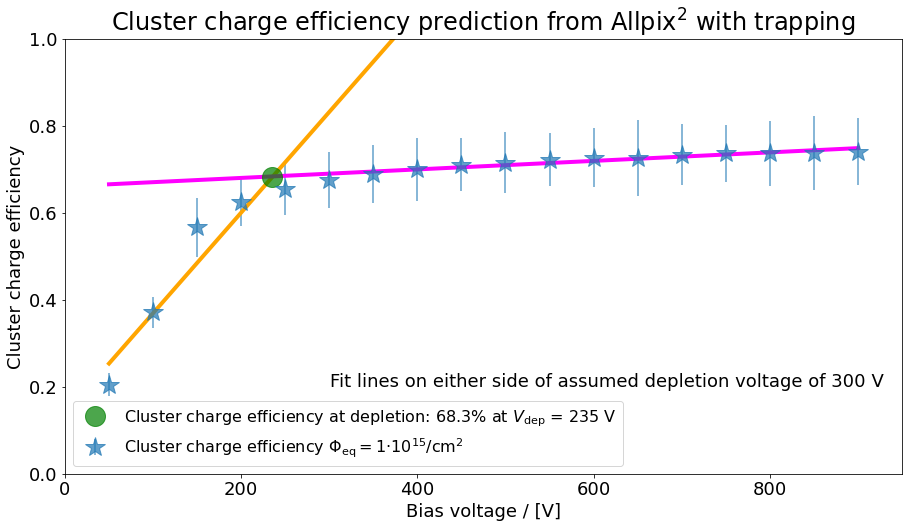

In [30]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
voltage = -600
plot_file_name = ''
for fluence in ['1e15']:
    x = charge_fractions[fluence]['bias']
    y = charge_fractions[fluence]['cce']
    yerr = charge_fractions[fluence]['stddev']
    fluence_one, fluence_power = fluence.split('e')
    print(fluence_one)
    print(x)
    print(y)
    print(yerr)
    plt.ylim((0,1))
    plt.xlim((0,950))

    labelname = "Cluster charge efficiency $\Phi_{\mathrm{eq}}=$" + str(fluence_one) + "$\cdot 10^{" + str(fluence_power) +"}$/cm$^2$"
    print(labelname)
    #labelname = 'hi'
    plt.errorbar(x, y, yerr = yerr, label=labelname, fmt=markerstyle, markersize=20, alpha=0.7)

    #plt.errorbar(x, y, yerr = yerr, label='Cluster charge efficiency $\Phi_{\mathrm{eq}}=' + str(fluence_one) + '10^{' + str(fluence_power) +'$', fmt=markerstyle, markersize=20, alpha=0.7)
    plt.title("Cluster charge efficiency prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Cluster charge efficiency", fontsize = 18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
plt.plot(xrange, fitline1, color='orange', linewidth=4)
plt.plot(xrange, fitline2, color='magenta', linewidth=4)
maxcce = "Cluster charge efficiency at depletion: " + str(round(100*fitline1[idx][0],1))
maxcce += '% at $V_\mathrm{dep}$ = ' + str(int(round(float(xrange[idx]), 0))) + ' V'
plt.annotate("Fit lines on either side of assumed depletion voltage of " + str(depletion) + " V", (300.8, 0.2), fontsize=18)
plt.plot(xrange[idx], fitline1[idx], 'o', markersize=20, alpha=0.7, color='green', label = maxcce)
plt.legend(fontsize = 16, loc='best')
dirname = os.path.dirname(filename)
plt.savefig(os.path.join(dirname + filename[:filename.index('_')] + '_' + fluence + '_cce_fitted.png'), bbox_inches="tight")
plt.show()


1
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.20511923, 0.37095504, 0.56653079, 0.62603457, 0.65602693, 0.67668264, 0.68994667, 0.70012195, 0.71046846, 0.71537418, 0.72237509, 0.72638099, 0.72643531, 0.73370456, 0.73699976, 0.73681391, 0.73762219, 0.74088099]
[0.026051811, 0.035120948, 0.067184009, 0.057087088, 0.060606741, 0.064384693, 0.066670307, 0.071830858, 0.060990125, 0.070330152, 0.060640395, 0.067735744, 0.086590034, 0.069767043, 0.064997245, 0.073983881, 0.085098061, 0.077373391]
Cluster charge efficiency $\Phi_{\mathrm{eq}}=$1$\cdot 10^{15}$/cm$^2$


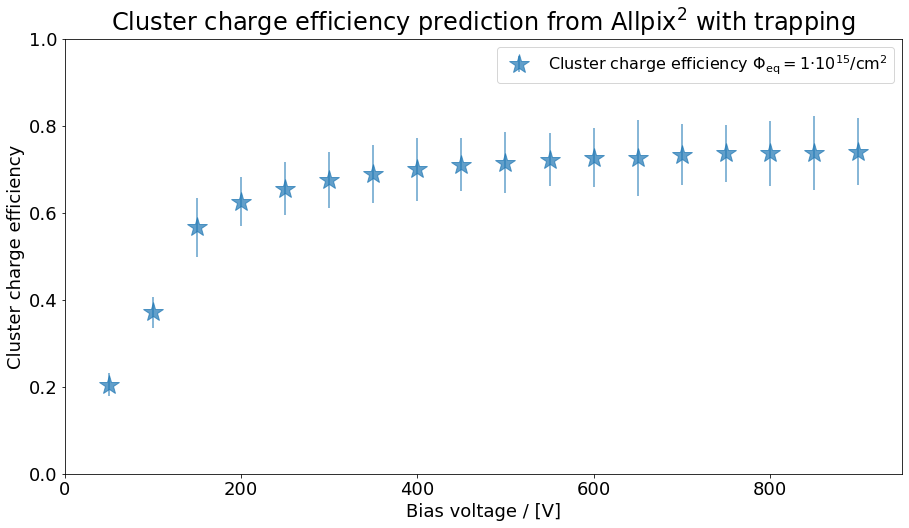

In [31]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
voltage = -600
plot_file_name = ''
for fluence in charge_fractions:
    x = charge_fractions[fluence]['bias']
    y = charge_fractions[fluence]['cce']
    yerr = charge_fractions[fluence]['stddev']
    fluence_one, fluence_power = fluence.split('e')
    print(fluence_one)
    print(x)
    print(y)
    print(yerr)
    plt.ylim((0,1))
    plt.xlim((0,950))

    labelname = "Cluster charge efficiency $\Phi_{\mathrm{eq}}=$" + str(fluence_one) + "$\cdot 10^{" + str(fluence_power) +"}$/cm$^2$"
    print(labelname)
    #labelname = 'hi'
    plt.errorbar(x, y, yerr = yerr, label=labelname, fmt=markerstyle, markersize=20, alpha=0.7)

    #plt.errorbar(x, y, yerr = yerr, label='Cluster charge efficiency $\Phi_{\mathrm{eq}}=' + str(fluence_one) + '10^{' + str(fluence_power) +'$', fmt=markerstyle, markersize=20, alpha=0.7)
    plt.title("Cluster charge efficiency prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Cluster charge efficiency", fontsize = 18)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
dirname = os.path.dirname(filename)
plt.savefig(os.path.join(dirname + filename[:filename.index('_')] + '_cce.png'), bbox_inches="tight")
plt.show()


In [14]:
#cluster_charges = {'ljubljana': {}, 'dortmund': {}, 'cmstracker': {}}
#cluster_charges = {'1e13': {}, '1e15': {}}
cluster_charges = {'1e15': {}}

for fluence in cluster_charges:
    cluster_charges[fluence] = {'bias': [], 'mpv': [], 'err': []}
for fluence in cluster_charges.keys():
    print(fluence)
    filenames = glob.glob("*mpv*" + fluence + "*txt")
    print(filenames)
    filename = filenames[0]
    with open(filename) as mpv_vs_bias:
        for line in mpv_vs_bias:
            if 'mpv' in line or line.startswith('#') or line.strip() == '': continue
            bias, mpv, err = line.split()
            print(line)
            if 'None' in mpv: continue
            cluster_charges[fluence]['bias'].append(float(bias.split('e')[0]))
            cluster_charges[fluence]['mpv'].append(float(mpv))
            cluster_charges[fluence]['err'].append(float(err))   

1e15
['20220516_smaller_beam_mpv_1e15.txt']
50 2.96381 0.0139861

100 5.41358 0.024436

150 8.38586 0.0393335

200 9.15605 0.0404886

250 9.55415 0.0438133

300 10.0461 0.0448468

350 10.0509 0.0454235

400 10.2924 0.0491029

450 10.3715 0.0550831

500 10.6035 0.0467225

550 10.6353 0.046118

600 10.5897 0.0485838

650 10.6974 0.0488639

700 10.8374 0.0493836

750 10.9197 0.0517181

800 10.8248 0.0481538

850 10.8639 0.0527868

900 11.0703 0.0513498



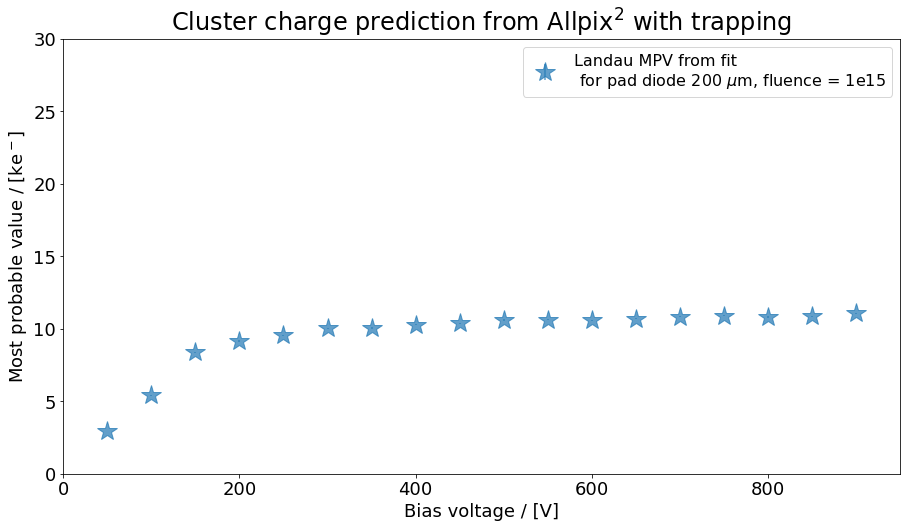

In [15]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
model = 'cmstracker'
voltage = -600
plot_file_name = ''
for fluence in cluster_charges:
    x = cluster_charges[fluence]['bias']
    y = cluster_charges[fluence]['mpv']
    yerr = cluster_charges[fluence]['err']
    plt.errorbar(x, y, yerr = yerr, label="Landau MPV from fit\n for pad diode " + str(thickness) + " $\mu$m, fluence = " + fluence, fmt=markerstyle, markersize=20, alpha=0.7)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    filenames = glob.glob("*" + model + "*dat")
    plt.title("Cluster charge prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Most probable value / [ke$^-$]", fontsize = 18)
    plot_file_name += os.path.basename(filename)[:-4] + '_'
    plt.ylim((0,30))
    plt.xlim((0,950))
plt.savefig(os.path.join(dirname, plot_file_name + 'cluster_charge.png'), bbox_inches="tight")
plt.show()